In [1]:
import shutil
# Corn
source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot"
destination_dir = "/kaggle/working/Gray_leaf_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Common_rust_"
destination_dir = "/kaggle/working/Common_rust"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Northern_Leaf_Blight"
destination_dir = "/kaggle/working/Northern_Leaf_Blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___healthy"
destination_dir = "/kaggle/working/healthy"
shutil.copytree(source_dir, destination_dir)

# Tomato
source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Bacterial_spot"
destination_dir = "/kaggle/working/Tomato___Bacterial_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Early_blight"
destination_dir = "/kaggle/working/Tomato___Early_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Late_blight"
destination_dir = "/kaggle/working/Tomato___Late_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Leaf_Mold"
destination_dir = "/kaggle/working/Tomato___Leaf_Mold"
shutil.copytree(source_dir, destination_dir)

# Tomato
source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Septoria_leaf_spot"
destination_dir = "/kaggle/working/Tomato___Septoria_leaf_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Spider_mites Two-spotted_spider_mite"
destination_dir = "/kaggle/working/Tomato___Spider_mites Two-spotted_spider_mite"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Target_Spot"
destination_dir = "/kaggle/working/Tomato___Target_Spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
destination_dir = "/kaggle/working/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Tomato_mosaic_virus"
destination_dir = "/kaggle/working/Tomato___Tomato_mosaic_virus"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___healthy"
destination_dir = "/kaggle/working/Tomato___healthy"
shutil.copytree(source_dir, destination_dir)

# Apple
source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab"
destination_dir = "/kaggle/working/Apple___Apple_scab"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___Black_rot"
destination_dir = "/kaggle/working/Apple___Black_rot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___Cedar_apple_rust"
destination_dir = "/kaggle/working/Apple___Cedar_apple_rust"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___healthy"
destination_dir = "/kaggle/working/Apple___healthy"
shutil.copytree(source_dir, destination_dir)

# Potato
source_dir = "/kaggle/input/plantvillage-dataset/color/Potato___Early_blight"
destination_dir = "/kaggle/working/Potato___Early_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Potato___Late_blight"
destination_dir = "/kaggle/working/Potato___Late_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Potato___healthy"
destination_dir = "/kaggle/working/Potato___healthy"
shutil.copytree(source_dir, destination_dir)


'/kaggle/working/Potato___healthy'

In [2]:
import os

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
import keras
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical, plot_model
import imgaug.augmenters as iaa


2025-04-18 07:26:37.731621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-18 07:26:37.731767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-18 07:26:37.895265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data_path = '/kaggle/working/'

In [4]:
classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

print("Dataset Classes:")
for cls in classes:
    print(cls)

Dataset Classes:
Potato___Late_blight
Northern_Leaf_Blight
Apple___healthy
Gray_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Potato___Early_blight
Tomato___Bacterial_spot
Tomato___Leaf_Mold
Tomato___Target_Spot
Apple___Black_rot
Common_rust
Tomato___Early_blight
Tomato___Septoria_leaf_spot
Apple___Apple_scab
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___healthy
Apple___Cedar_apple_rust
Potato___healthy
healthy
Tomato___Tomato_mosaic_virus
Tomato___Late_blight


In [5]:
def create_dataframe(data_path):
    filepaths = []
    labels = []

    for fold in os.listdir(data_path):
        f_path = os.path.join(data_path, fold)
        if os.path.isdir(f_path):
            imgs = os.listdir(f_path)
            for img in imgs:
                img_path = os.path.join(f_path, img)
                filepaths.append(img_path)
                labels.append(fold)

    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')
    return pd.concat([fseries, lseries], axis=1)

# Create DataFrame for the dataset
df = create_dataframe(data_path)

In [6]:
df

Filepaths                Labels
0      /kaggle/working/Potato___Late_blight/74277267-...  Potato___Late_blight
1      /kaggle/working/Potato___Late_blight/267d6db0-...  Potato___Late_blight
2      /kaggle/working/Potato___Late_blight/547d3544-...  Potato___Late_blight
3      /kaggle/working/Potato___Late_blight/a6b27bfe-...  Potato___Late_blight
4      /kaggle/working/Potato___Late_blight/44112cb9-...  Potato___Late_blight
...                                                  ...                   ...
27330  /kaggle/working/Tomato___Late_blight/933211e0-...  Tomato___Late_blight
27331  /kaggle/working/Tomato___Late_blight/e242de40-...  Tomato___Late_blight
27332  /kaggle/working/Tomato___Late_blight/b3094af3-...  Tomato___Late_blight
27333  /kaggle/working/Tomato___Late_blight/0fa1b773-...  Tomato___Late_blight
27334  /kaggle/working/Tomato___Late_blight/09d2deda-...  Tomato___Late_blight

[27335 rows x 2 columns]

In [7]:
# Step 1: Split into 70% training and 30% dummy
train_df, dummy_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=42)

# Step 2: Split dummy_df into 20% testing and 10% validation
test_df, valid_df = train_test_split(dummy_df, train_size=2/3, shuffle=True, random_state=42)

In [8]:
print(train_df.shape)
print(dummy_df.shape)
print(valid_df.shape)
print(test_df.shape)

(19134, 2)
(8201, 2)
(2734, 2)
(5467, 2)


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data generators remain the same
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 19134 validated image filenames belonging to 21 classes.
Found 2734 validated image filenames belonging to 21 classes.
Found 5467 validated image filenames belonging to 21 classes.


In [11]:
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {valid_generator.samples}')
print(f'Test samples: {test_generator.samples}')

Training samples: 19134
Validation samples: 2734
Test samples: 5467


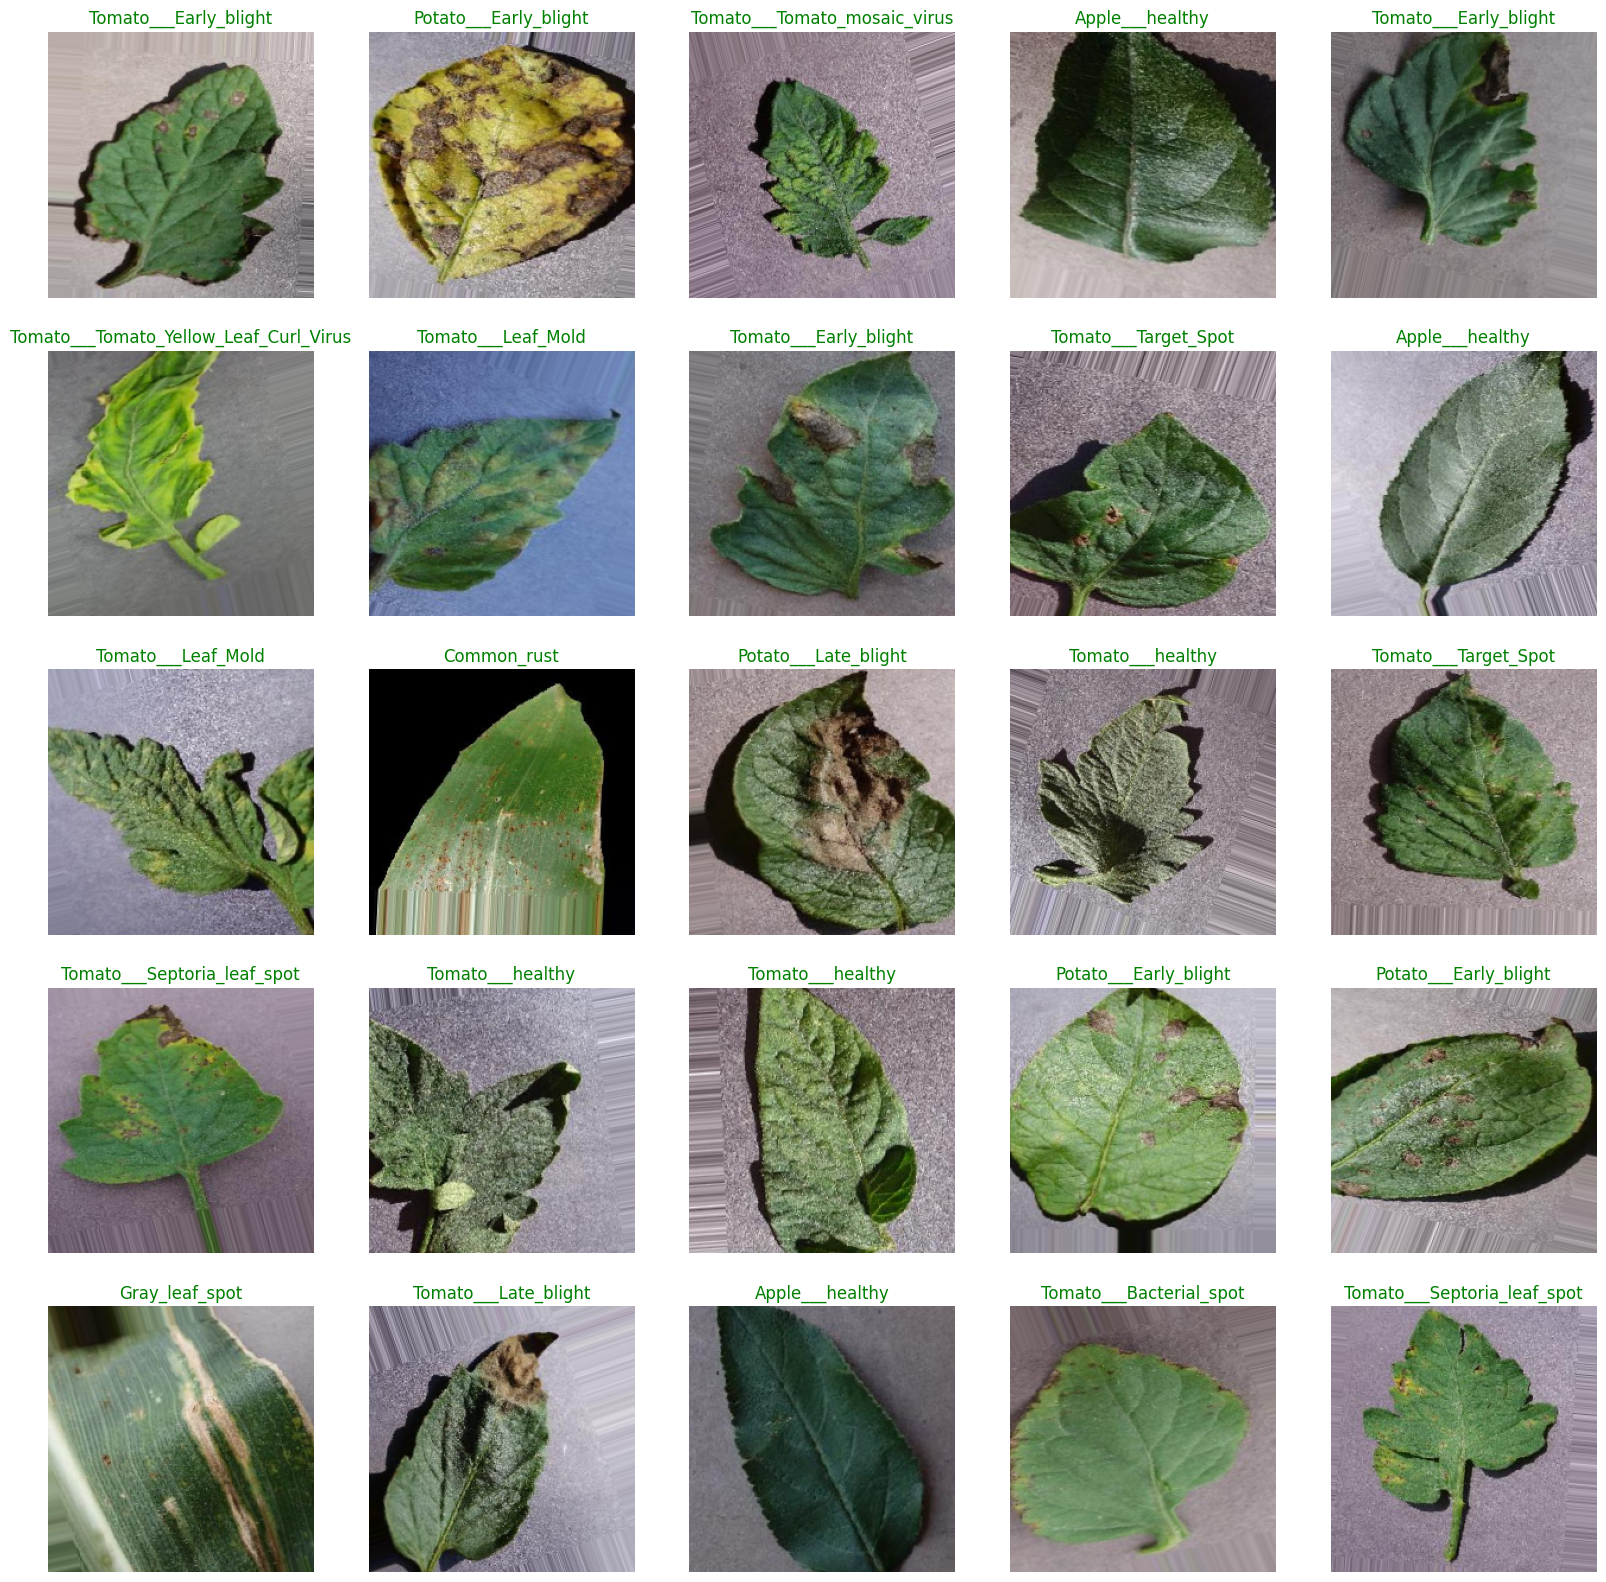

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(image_gen):
    class_dict = image_gen.class_indices
    classes = list(class_dict.keys())
    
    images, labels = next(image_gen)
    
    plt.figure(figsize=(20, 20))
    
    num_images = min(len(labels), 25)
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        
        image = images[i]
        
        plt.imshow(image)
        
        index = np.argmax(labels[i])
        class_name = classes[index]
        
        plt.title(class_name, color="green", fontsize=12)
        plt.axis('off')
    
    plt.show()

show_images(train_generator)

In [ ]:
input_shape = (224, 224, 3)
n_classes = len(train_generator.class_indices) # n_classes = 10

model = keras.Sequential([
    # Block 1
    keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=(3, 3), padding='valid', use_bias=False, input_shape=input_shape), 
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'), 
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    # Block 2
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Block 3
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Block 4
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Block 5
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Classifier Head
    keras.layers.Flatten(),
    keras.layers.Dense(256, use_bias=False), 
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 64)     │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 256)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,536 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,256,405 (4.79 MB)

 Trainable params: 1,254,229 (4.78 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [14]:
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=valid_generator,
    epochs=50
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/598 ━━━━━━━━━━━━━━━━━━━━ 2:01:45 12s/step - accuracy: 0.0312 - loss: 3.4444

I0000 00:00:1744961226.229838      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


598/598 ━━━━━━━━━━━━━━━━━━━━ 196s 308ms/step - accuracy: 0.5263 - loss: 1.5953 - val_accuracy: 0.2981 - val_loss: 4.0132
Epoch 2/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 177s 293ms/step - accuracy: 0.7738 - loss: 0.6904 - val_accuracy: 0.6631 - val_loss: 1.2148
Epoch 3/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 179s 296ms/step - accuracy: 0.8358 - loss: 0.5042 - val_accuracy: 0.4535 - val_loss: 3.8054
Epoch 4/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 179s 296ms/step - accuracy: 0.8738 - loss: 0.3872 - val_accuracy: 0.8336 - val_loss: 0.5566
Epoch 5/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 179s 295ms/step - accuracy: 0.8903 - loss: 0.3302 - val_accuracy: 0.7696 - val_loss: 0.7595
Epoch 6/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 178s 294ms/step - accuracy: 0.9046 - loss: 0.2856 - val_accuracy: 0.8574 - val_loss: 0.4392
Epoch 7/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 178s 294ms/step - accuracy: 0.9133 - loss: 0.2675 - val_accuracy: 0.7864 - val_loss: 0.7167
Epoch 8/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 177s 293ms/step - accuracy: 0.9160 - loss: 0.23

In [15]:
scores = model.evaluate(test_generator)
scores

171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8018 - loss: 1.1679


[1.1671392917633057, 0.8031827211380005]

171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step


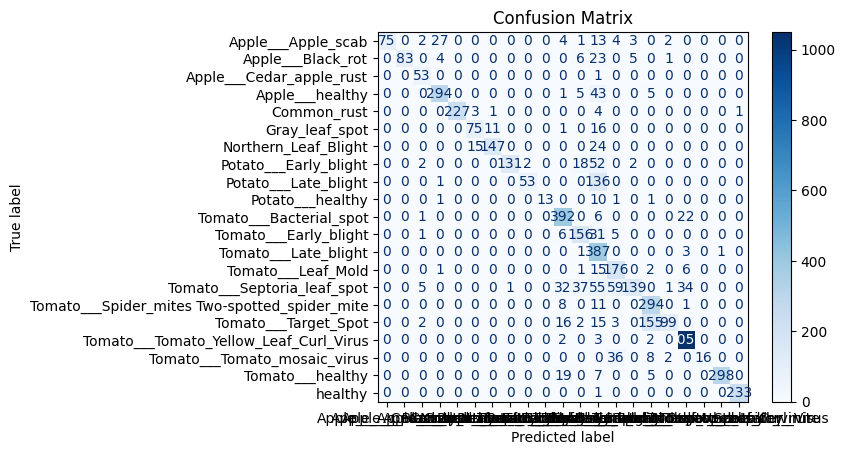

In [16]:
predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [17]:
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step


In [18]:
true_classes = test_generator.classes

In [19]:
from sklearn.metrics import classification_report  

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       1.00      0.57      0.73       131
                            Apple___Black_rot       1.00      0.68      0.81       122
                     Apple___Cedar_apple_rust       0.80      0.98      0.88        54
                              Apple___healthy       0.90      0.84      0.87       348
                                  Common_rust       1.00      0.96      0.98       236
                               Gray_leaf_spot       0.81      0.73      0.77       103
                         Northern_Leaf_Blight       0.92      0.79      0.85       186
                        Potato___Early_blight       0.99      0.63      0.77       207
                         Potato___Late_blight       0.96      0.28      0.43       190
                             Potato___healthy       1.00      0.50      0.67        26
                      Tomato___Bacterial_s

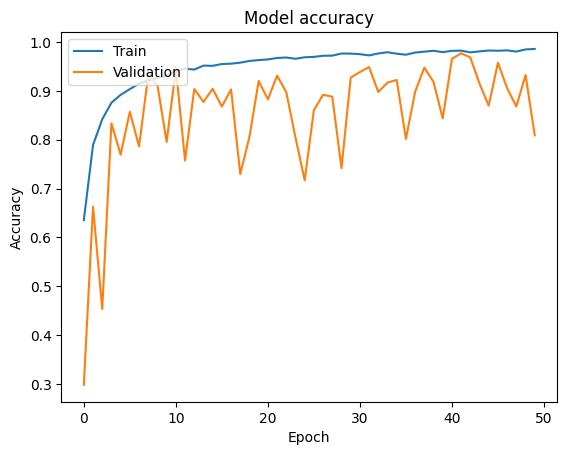

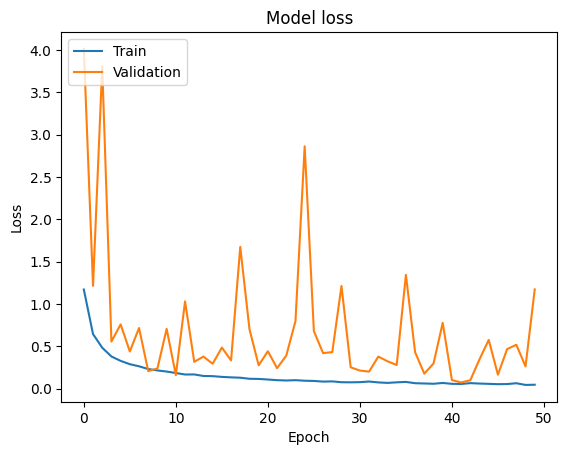

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
import numpy as np

class_names = list(test_generator.class_indices.keys())

images_batch, labels_batch = next(test_generator)

first_image = images_batch[0]
first_label = np.argmax(labels_batch[0])  

batch_prediction = model.predict(images_batch)
predicted_label_index = np.argmax(batch_prediction[0])

print("Actual label:", class_names[first_label])
print("Predicted label:", class_names[predicted_label_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
Actual label: Tomato___healthy
Predicted label: Tomato___healthy


In [22]:
import tensorflow as tf
import numpy as np

def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

class_names = list(test_generator.class_indices.keys())

images_batch, labels_batch = next(test_generator)
for i in range(min(len(images_batch), 9)):
    predicted_class, confidence = predict(model, images_batch[i], class_names)
    actual_class = class_names[np.argmax(labels_batch[i])]

    print(f"Actual: {actual_class}, Predicted: {predicted_class}, Confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
Actual: Tomato___Spider_mites Two-spotted_spider_mite, Predicted: Tomato___Spider_mites Two-spotted_spider_mite, Confidence: 99.97%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Potato___Late_blight, Predicted: Tomato___Late_blight, Confidence: 50.59%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Tomato___Leaf_Mold, Predicted: Tomato___Leaf_Mold, Confidence: 99.82%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Potato___Late_blight, Predicted: Potato___Late_blight, Confidence: 57.19%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Actual: Tomato___Early_blight, Predicted: Tomato___Late_blight, Confidence: 83.13%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Apple___Black_rot, Predicted: Apple___Black_rot, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual: Potato___Early_blight, Predicted: Tomato___Septoria_leaf_spot, Confidence: 64.5%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual: Tomato___Bacterial_spot, Predicted: Tomato___Bacterial_spot, Conf

In [23]:
model.save("Model_CNN2.h5")